# Proyek Analisis Data: Bike-Sharing Dataset(hour.csv)
- **Nama:** Hans Valerian Lenice
- **Email:** hhans6425@gmail.com
- **ID Dicoding:** hans_03

## Menentukan Pertanyaan Bisnis



1.   Bagaimana distribusi jumlah sewa sepeda (CNT) di seluruh dataset, dan di mana letak nilai rata-rata, median, dan modusnya?
2.   Apakah ada pola tertentu dalam distribusi jumlah sewa sepeda (CNT) berdasarkan suhu (Temperature)?



## Mengimport semua library yang akan dipakai

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

## Load Data and Prepare for Liniear Regression model

In [32]:
rental_data = pd.read_csv("hour.csv")
print(f"Shape of datafrane: {rental_data.shape}")
rental_data.head()

Shape of datafrane: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
# Use pandas DatetimeIndex to take out the day values from the given date
rental_data['day'] = pd.DatetimeIndex(rental_data['dteday']).day

print(f"New shape of dataframe: {rental_data.shape}")
rental_data.head(32)

New shape of dataframe: (17379, 18)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


## Visualization & Explanatory Analysis

In [34]:
#Show datatype of each column
rental_data.dtypes

numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
rental_data[numeric_features + ['cnt']].describe()

#Get the label column
label = rental_data['cnt']

#Create a figure for 2 subplots (2 rows and 1 column)
fig, ax = plt.subplots(2, 1, figsize=(9,12))

legend = "Mean:" + format(label.mean(), '.2f') + ", Median:" + format(label.median(), '.2f') + ", Mode:" + format(label.mode()[0], '.2f')

#Plot the histogram
"""A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets"."""
ax[0].hist(label, bins=100, label = legend)
ax[0].set_ylabel('Frequency')
ax[0].legend()

#Add lines for mean median and mode
ax[0].axvline(label.mean(), color= 'magenta', linestyle= 'dashed', linewidth=2)
ax[0].axvline(label.median(), color= 'cyan', linestyle='dashed', linewidth= 2)
ax[0].axvline(label.mode()[0], color= 'red', linestyle='dashed', linewidth= 2)

#Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('cnt')

fig.suptitle('CNT Distribution')
fig.show()

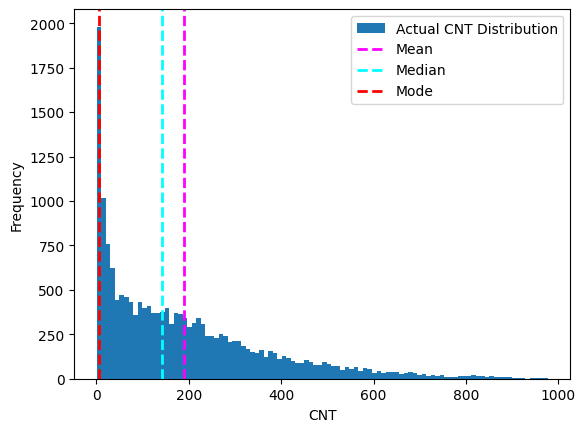

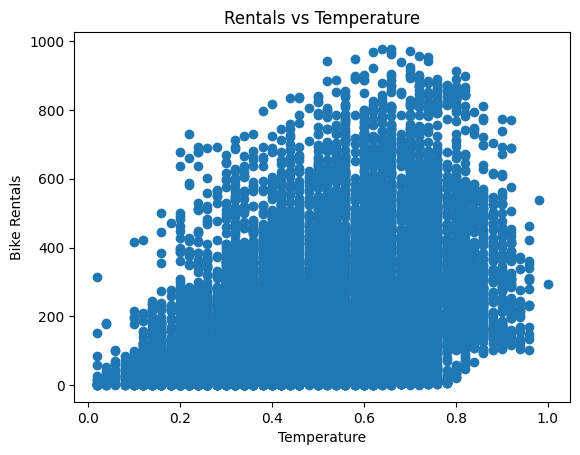

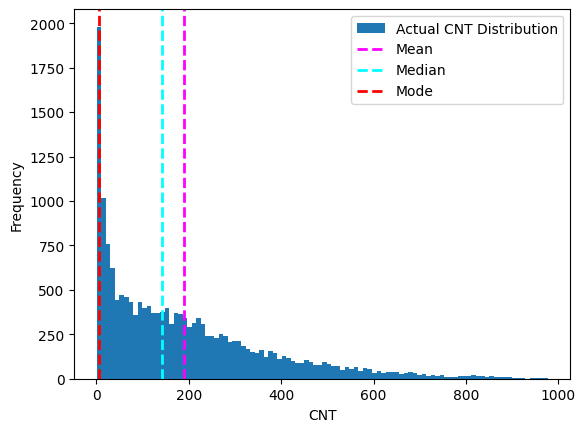

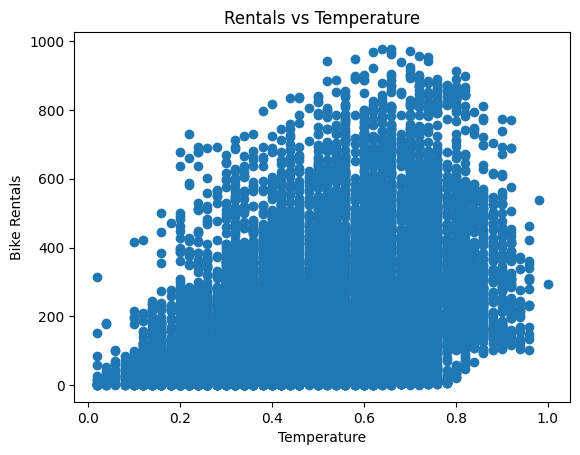

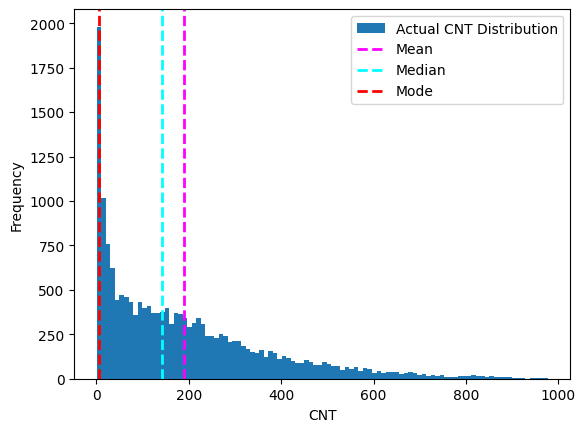

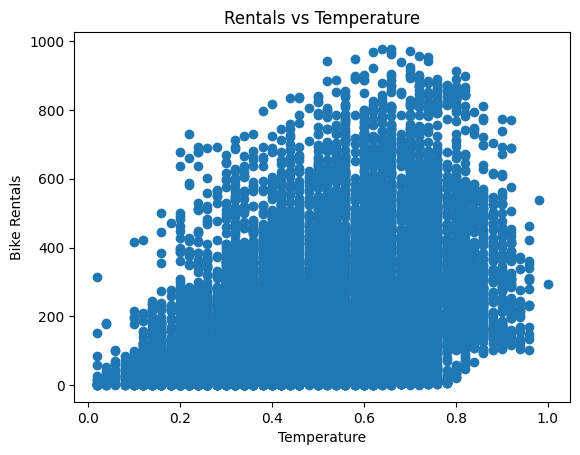

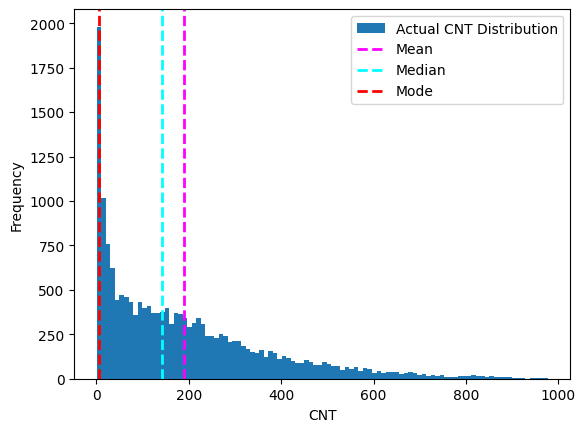

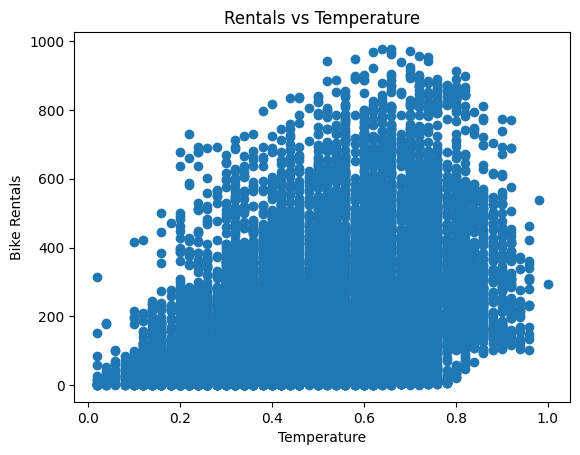

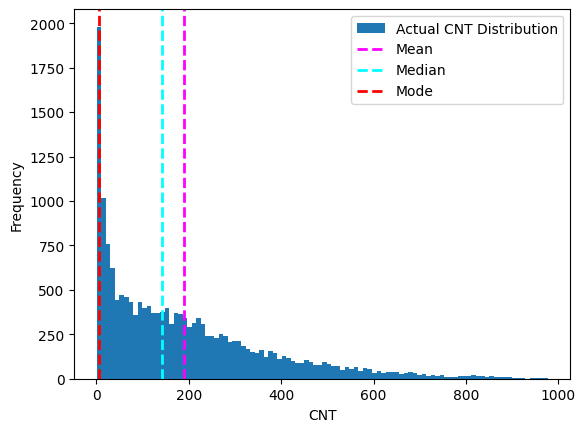

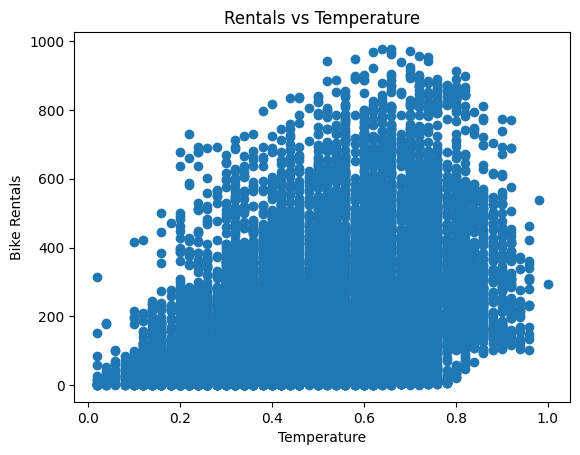

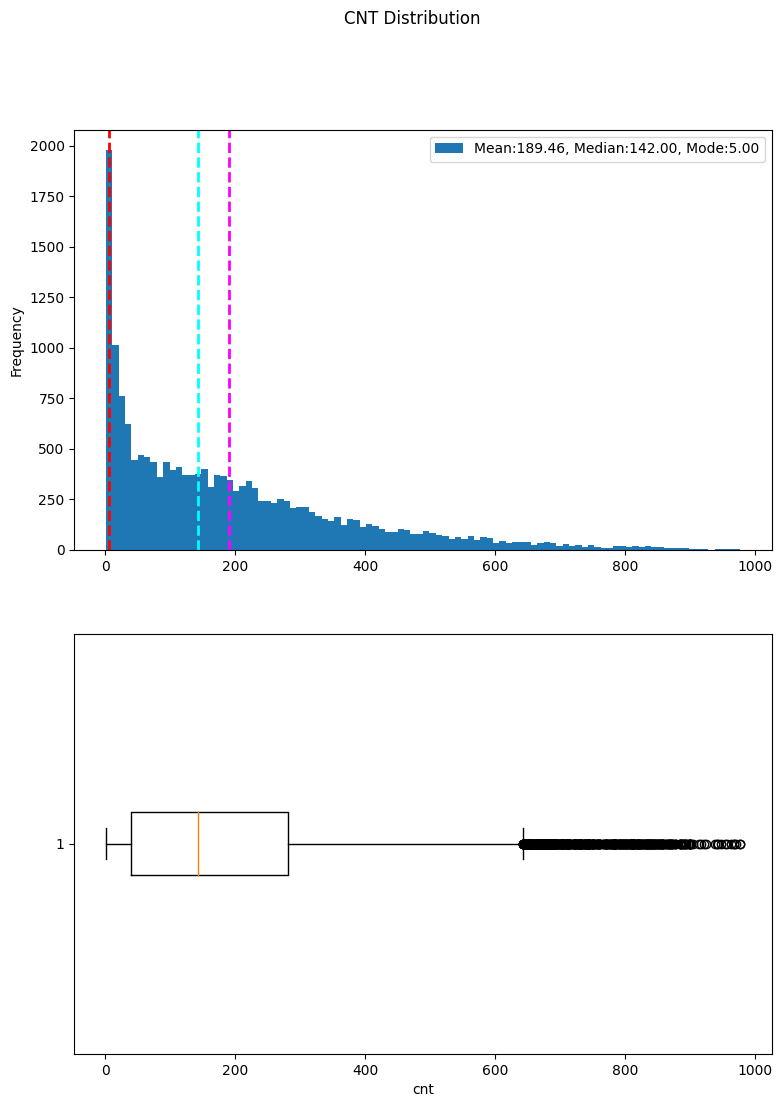

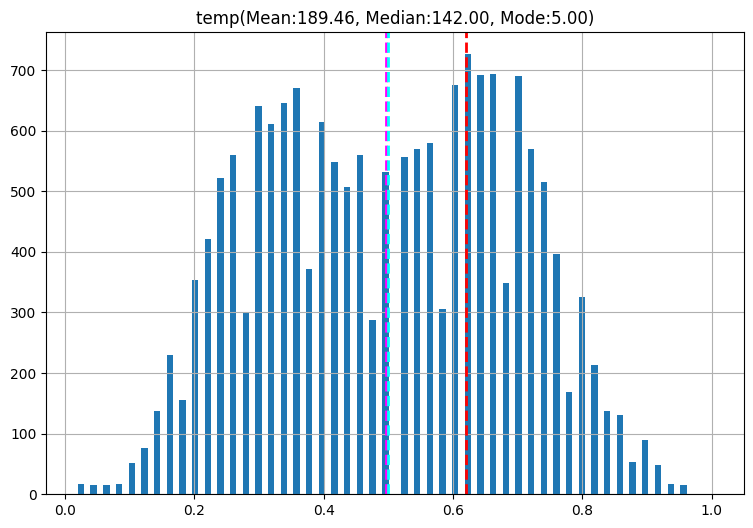

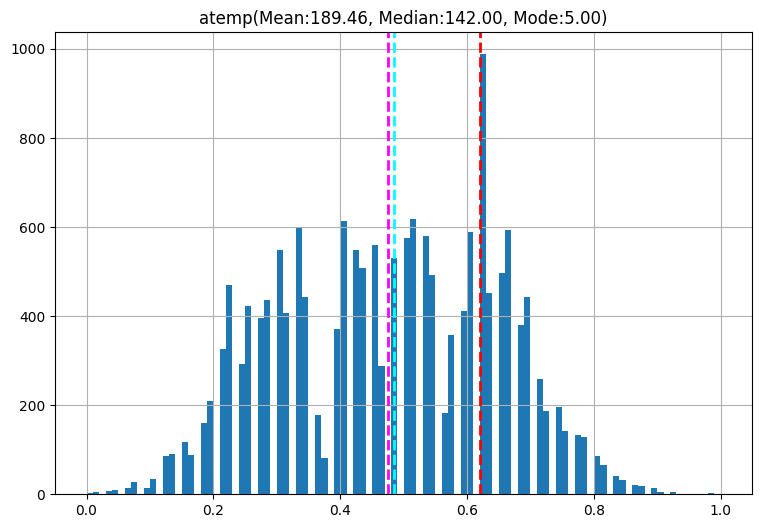

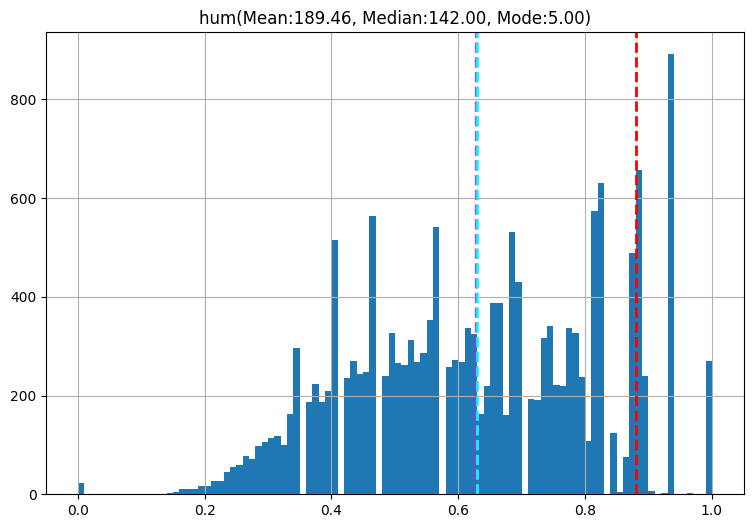

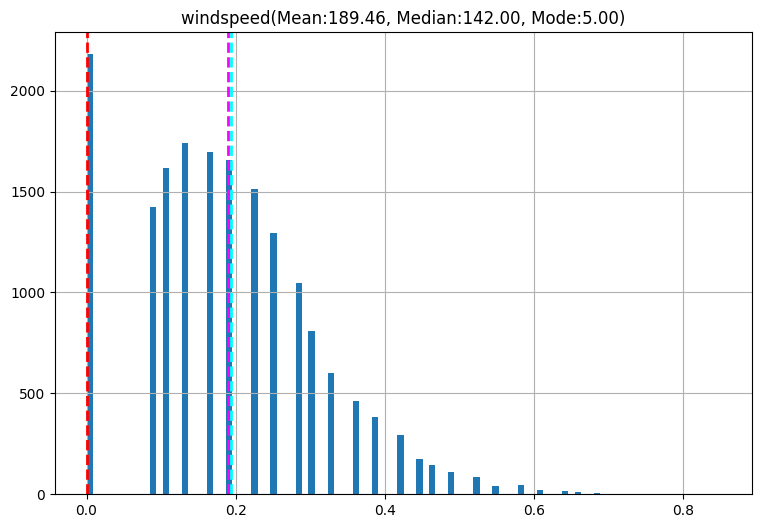

In [35]:
#Plot histogram for each of the numerical features
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca() #to get the current axes
    feature = rental_data[col]
    feature.hist(bins= 100, ax =ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.axvline(feature.mode()[0], color= 'red', linestyle='dashed', linewidth= 2)

    title = "Mean:" + format(label.mean(), '.2f') + ", Median:" + format(label.median(), '.2f') + ", Mode:" + format(label.mode()[0], '.2f')
    ax.set_title(col + "(" + title +")")
plt.show()

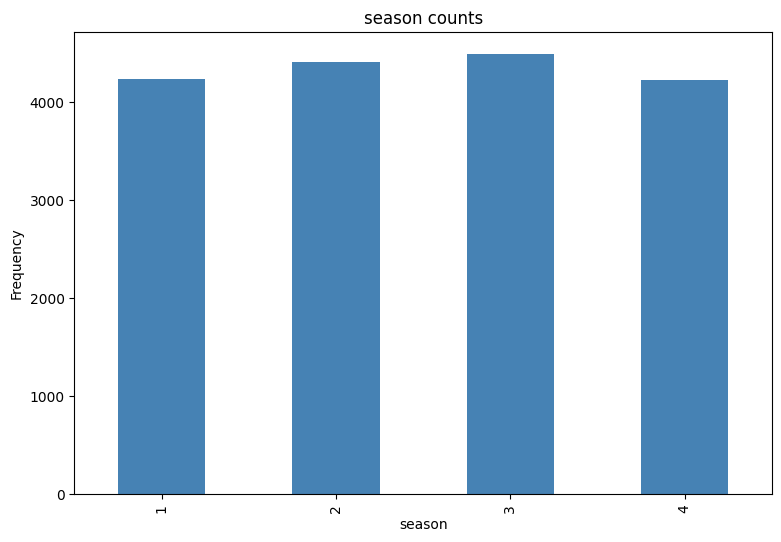

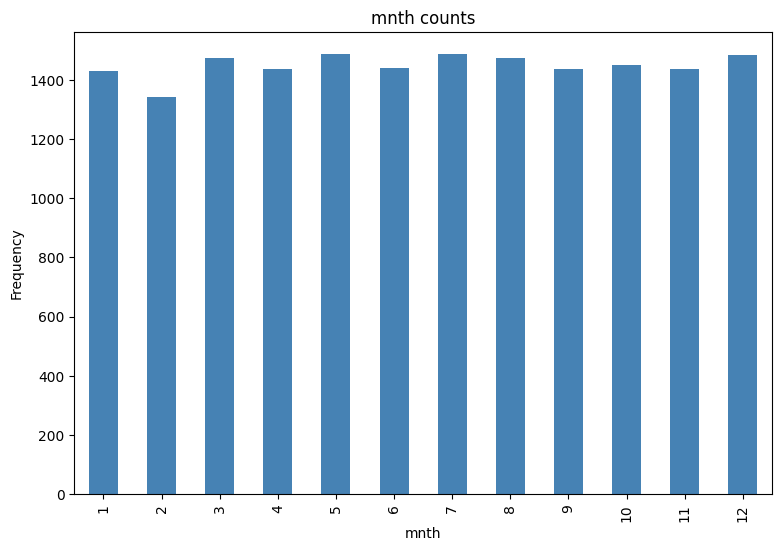

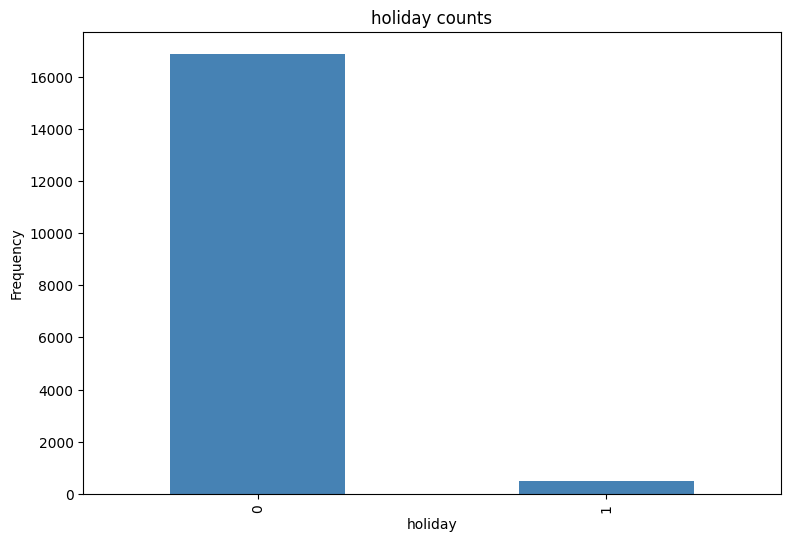

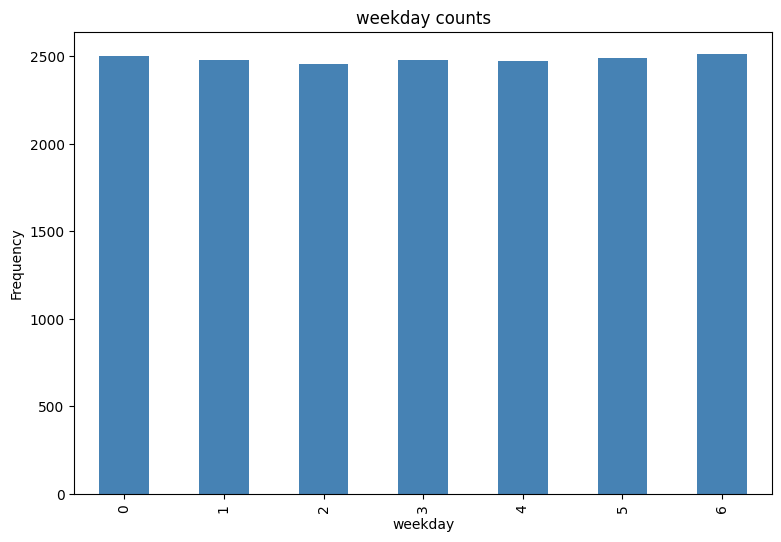

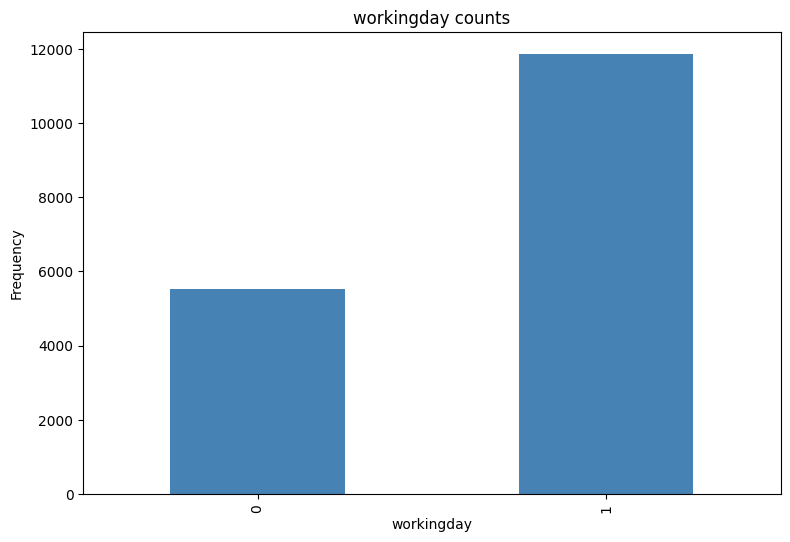

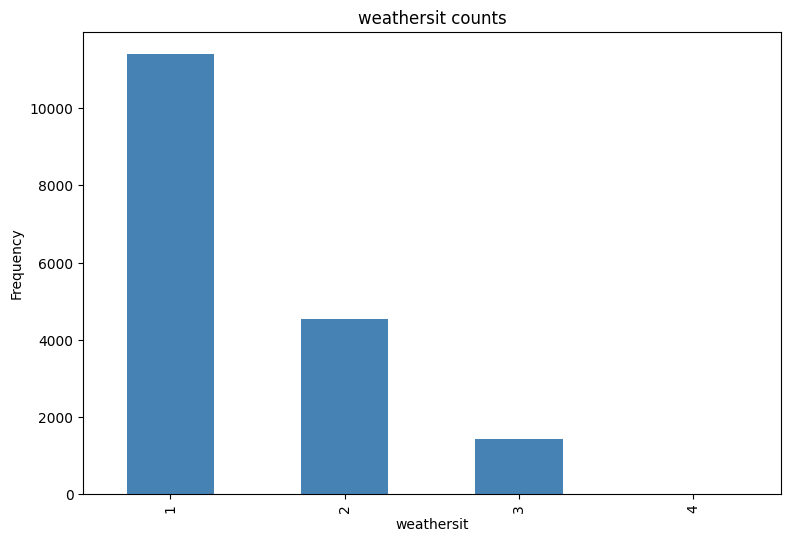

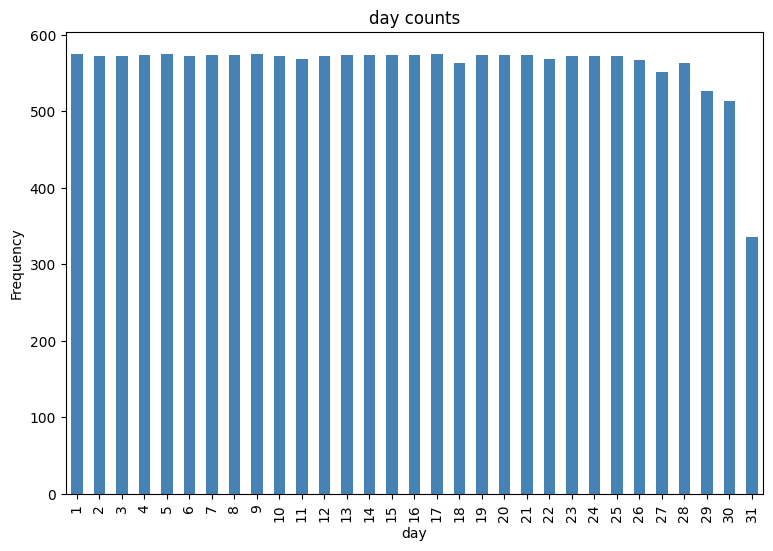

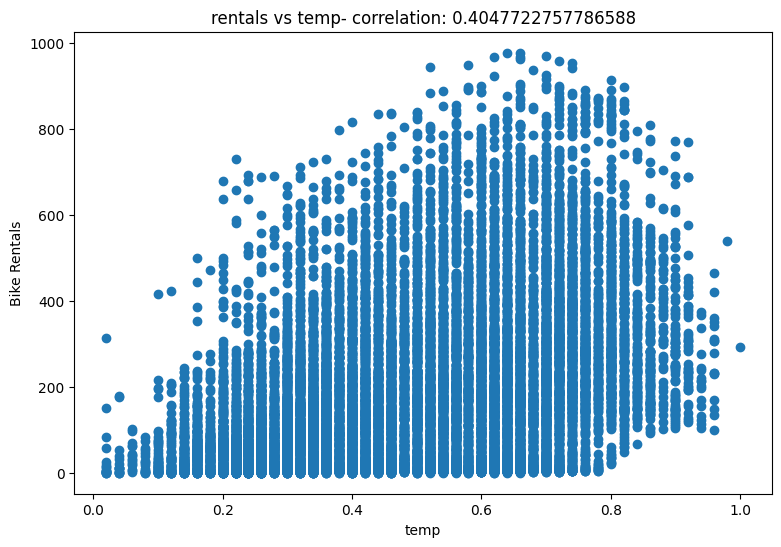

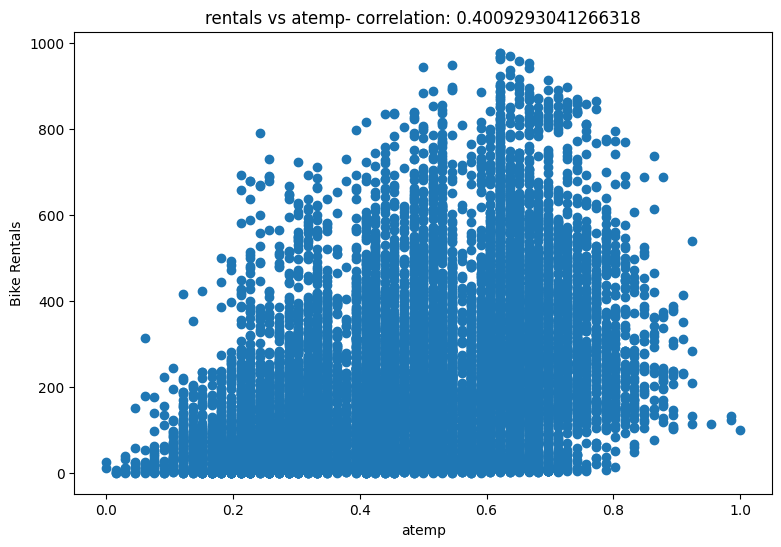

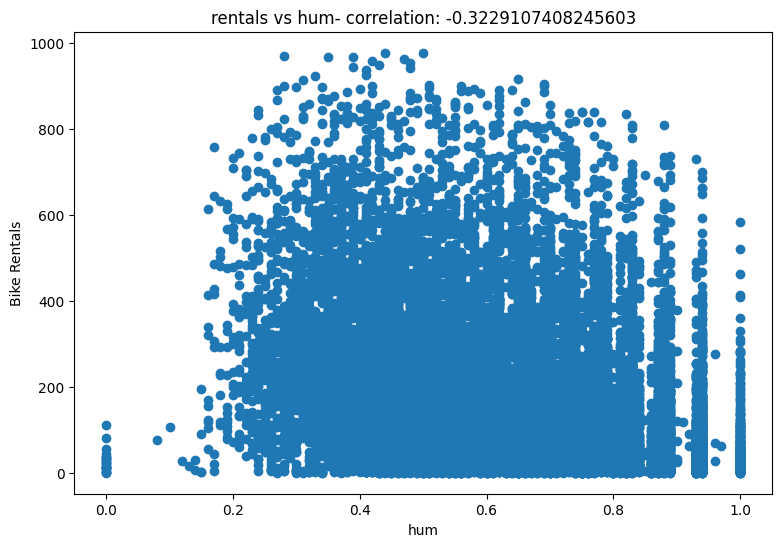

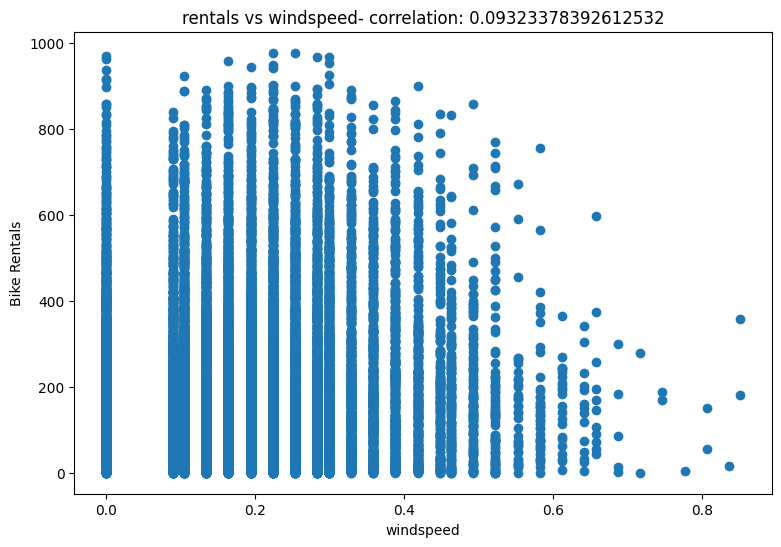

In [36]:
#Plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = rental_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()  # To get current axes
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() # To get current axes
    feature = rental_data[col]
    label = rental_data['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

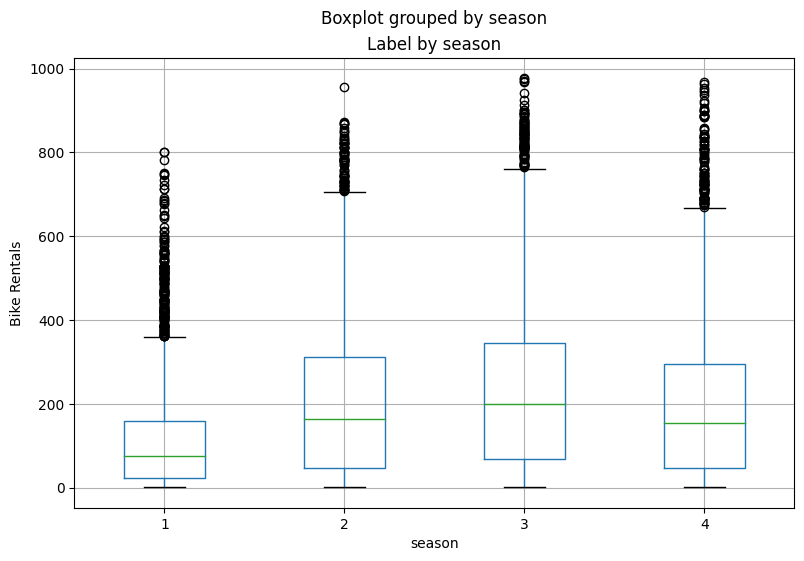

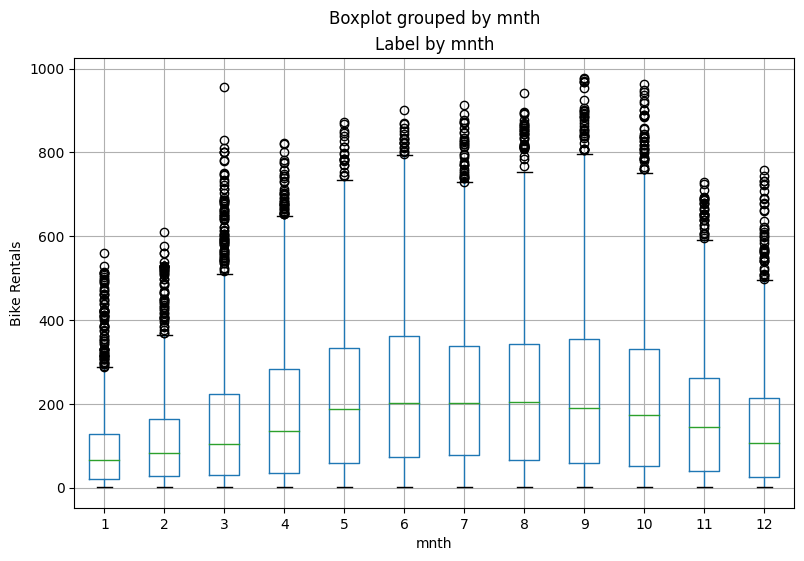

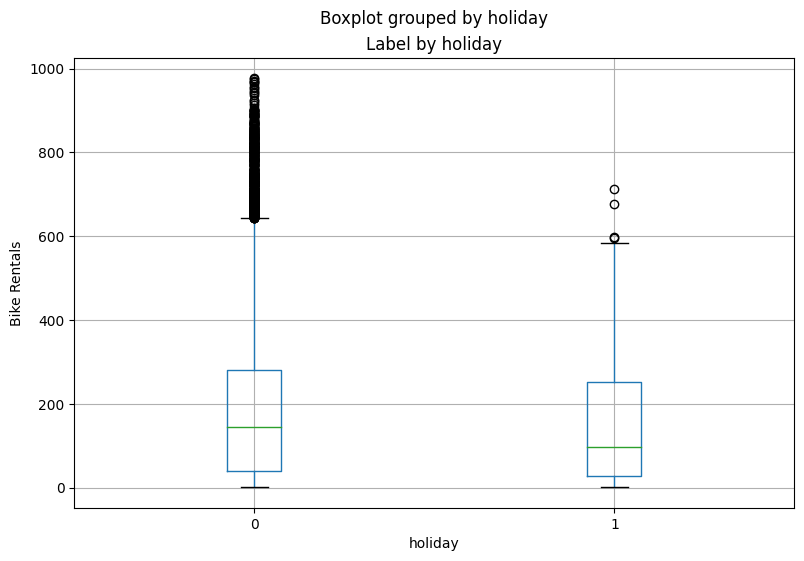

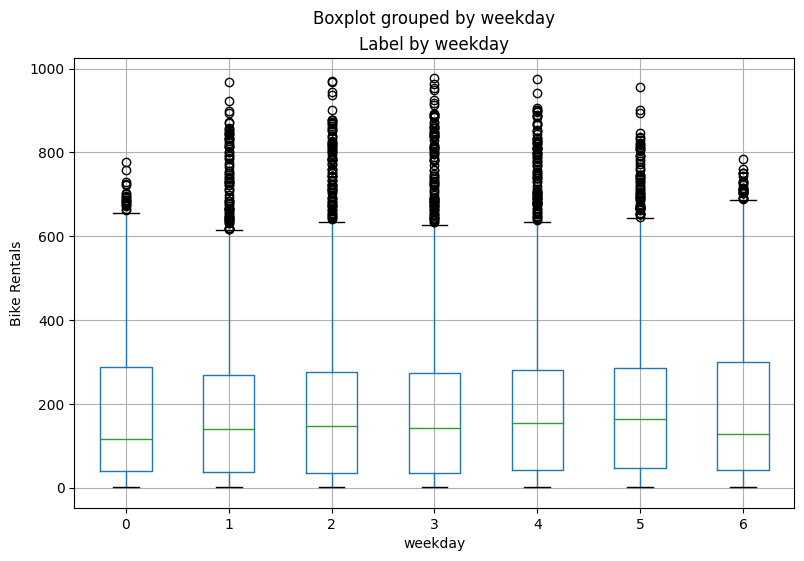

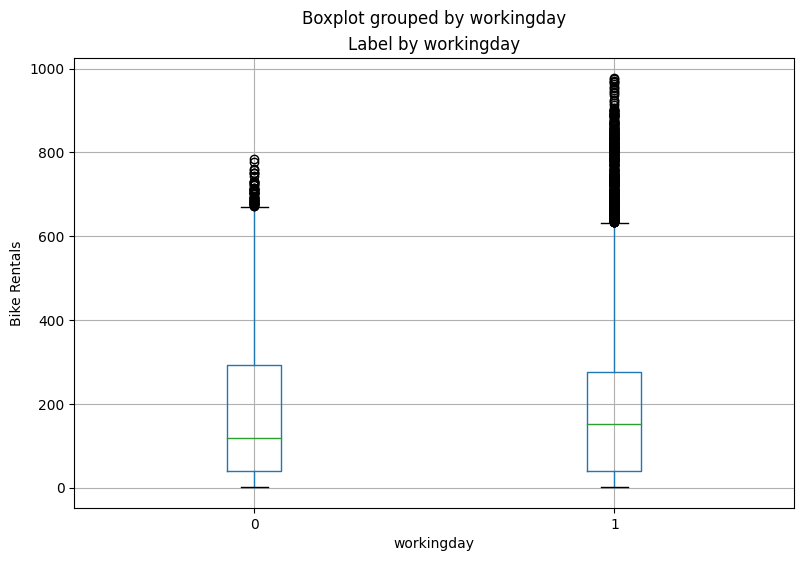

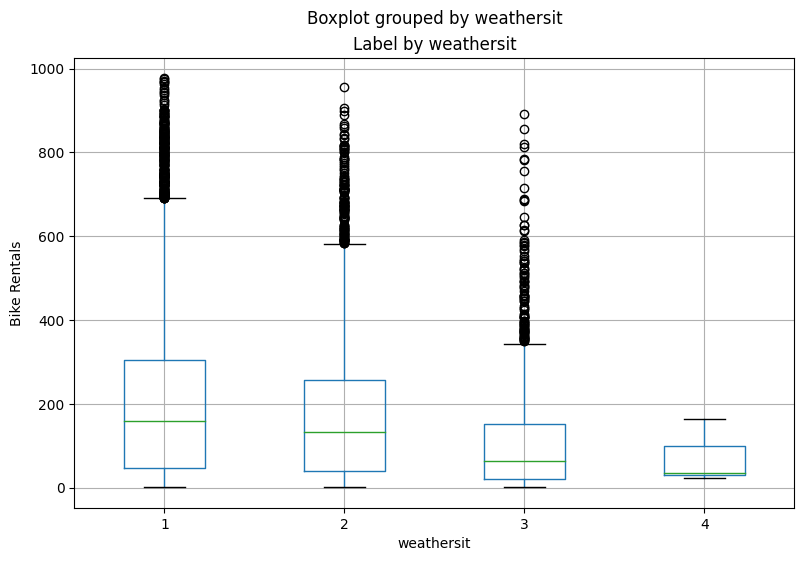

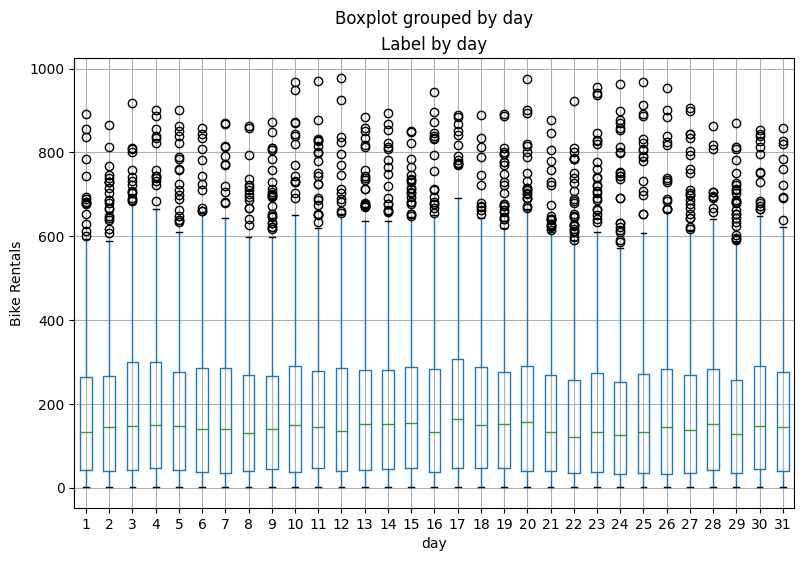

Features: [[1.     1.     0.     6.     0.     1.     0.24   0.2879 0.81   0.    ]
 [1.     1.     0.     6.     0.     1.     0.22   0.2727 0.8    0.    ]
 [1.     1.     0.     6.     0.     1.     0.22   0.2727 0.8    0.    ]
 [1.     1.     0.     6.     0.     1.     0.24   0.2879 0.75   0.    ]
 [1.     1.     0.     6.     0.     1.     0.24   0.2879 0.75   0.    ]], 
Labels: [16 40 32 13  1]


In [37]:
#Plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() # To get current axis
    rental_data.boxplot(column = 'cnt', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

# Separate features and labels
X = rental_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values
y = rental_data['cnt'].values

print(f'Features: {X[:5]}, \nLabels: {y[:5]}')

In [38]:
#Prepare the train_test_split
from sklearn.model_selection import train_test_split

#Split data 70%-30% into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

#Make LinearRegression model
from sklearn.linear_model import LinearRegression

#Fit the linear regression on the training set
model = LinearRegression().fit(X_train, y_train)
print(model)

X_train: (12165, 10) 
X_test: (5214, 10) 
y_train: (12165,) 
y_test: (5214,)
LinearRegression()


Predicted labels: [124. 115. 237.  93. 266. 140.  92. 330. 229. 129.]
Actaul labels: [  7   5 743 208 333 187 124 925 212 161]
Polynomial function:  
0.268 x + 136.2


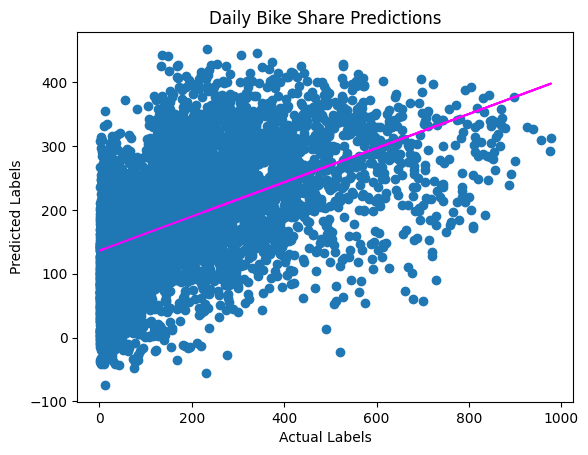

In [39]:
#Make Prediction model
predictions = model.predict(X_test)
np.set_printoptions(suppress=True) # suppress = True, suppresses the use of scientific notation for small numbers

print(f'Predicted labels: {np.round(predictions)[:10]}')
print(f'Actaul labels: {y_test[:10]}')

#Show the modelling
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
#Calculate the mse
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
#Calculate the rmse
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
#Calculate the r2
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

from sklearn.linear_model import Lasso
# Fit Lasso model on training set
model = Lasso().fit(X_train, y_train)
print(model)

MSE: 24024.367555471566
RMSE: 154.9979598429333
R2: 0.2728626163806126
Lasso()


MSE: 24132.917862697068
RMSE: 155.34773208095788
R2: 0.2695771610526094
Polynomial function:  
0.2459 x + 140.6


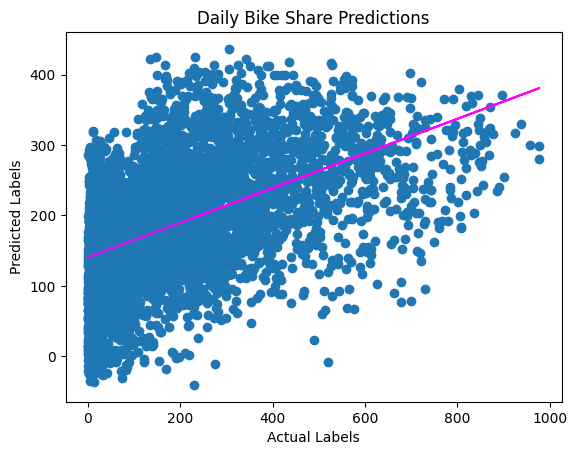

In [41]:
# Evaluate the model using text data
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

DecisionTreeRegressor()
|--- feature_7 <= 0.61
|   |--- feature_6 <= 0.35
|   |   |--- feature_6 <= 0.27
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_8 <= 0.41
|   |   |   |   |   |--- feature_6 <= 0.15
|   |   |   |   |   |   |--- feature_8 <= 0.35
|   |   |   |   |   |   |   |--- feature_7 <= 0.14
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.32
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.11
|   |   |   |   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  0.11
|   |   |   |   |   |   |   |   |   |   |   |--- value: [50.00]
|   |   |   |   |   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |   |   |   |   |--- value: [83.00]
|   |   |   |   |   |   |   |   |--- feature_8 >  0.32
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- value: [87.00]
|   |   |   |   |  

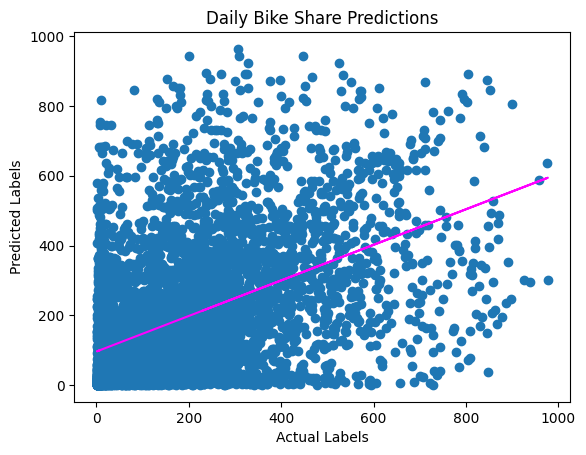

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Fit decistion tree model on training set alos known as model training
model = DecisionTreeRegressor().fit(X_train, y_train)
print(model)

# Visualize the model tree
tree = export_text(model)
print(tree)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

RandomForestRegressor() 

MSE: 19597.034826090356
RMSE: 139.98940969262767
R2: 0.4068631943280451
Polynomial function:  
0.4575 x + 106.2


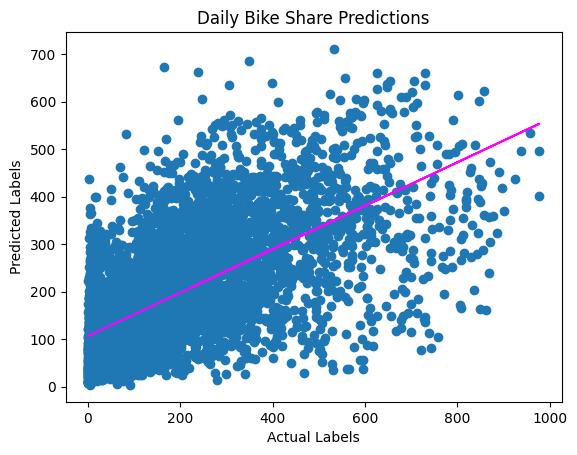

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

GradientBoostingRegressor() 

MSE: 21341.562912894355
RMSE: 146.08751799142306
R2: 0.35406215447714207
Polynomial function:  
0.3365 x + 122.7


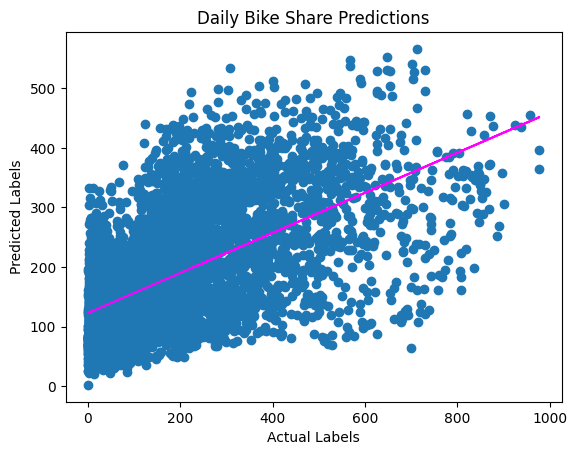

In [44]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()


Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 21137.33358671799
RMSE: 145.38684117456432
R2: 0.36024349421694357


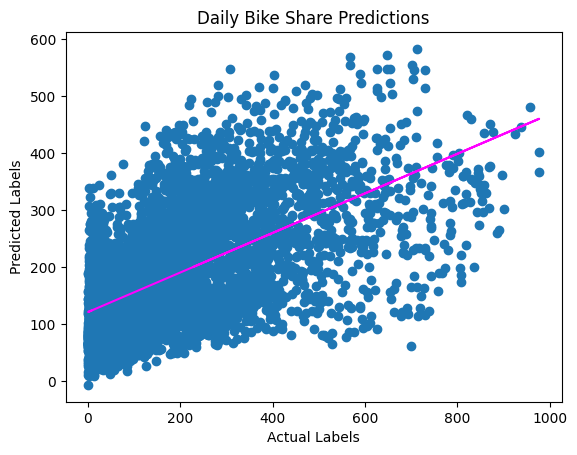

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])
MSE: 21304.022193520294
RMSE: 145.95897435074107
R2: 0.35519838669644255


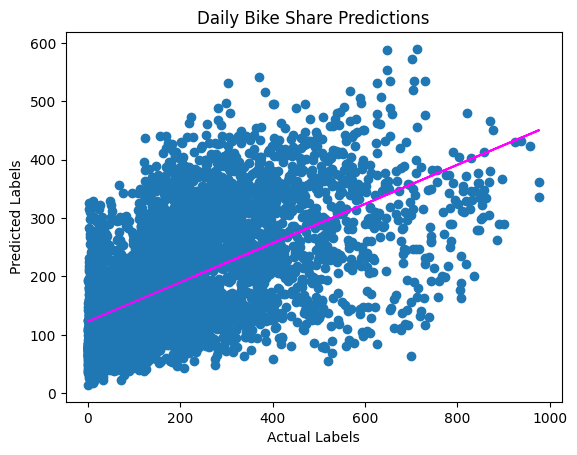

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 19553.182764083896
RMSE: 139.83269561902858
R2: 0.40819044981396235


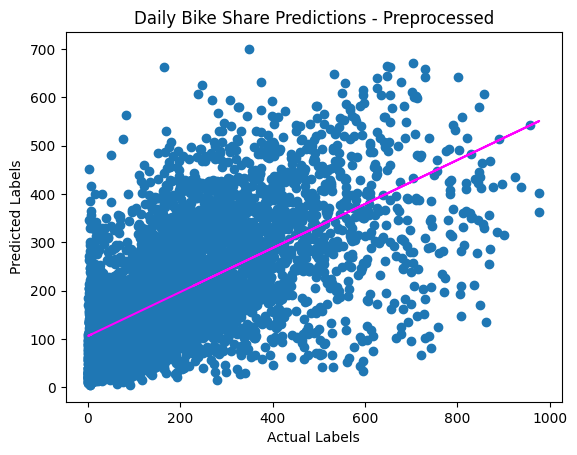

In [46]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [47]:
import joblib

#Save the model as a pickle file
filename = 'bike-rent.pkl'
joblib.dump(model, filename)

#Load the model from the file
loaded_model = joblib.load('bike-rent.pkl')

#Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

#Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

#An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 65 rentals
5-day rental predictions:
103.0
85.0
74.0
36.0
51.0


# Create Streamlit

In [48]:
#Create Streamlit
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

st.title('Linear Regression Model')
#Load the saved model
loaded_model = joblib.load('bike-rent.pkl')

#Load the data
rental_data = pd.read_csv("hour.csv")

def predict_rentals(features):
    #Use the model to predict rentals
    result = loaded_model.predict(features)
    return np.round(result)

def main():
    st.title('Bike Rental Prediction App')

    #Collect user input for features
    st.sidebar.header('Input Features')
    season = st.sidebar.slider('Season', 1, 4, 1)
    month = st.sidebar.slider('Month', 1, 12, 1)
    holiday = st.sidebar.selectbox('Holiday', [0, 1])
    weekday = st.sidebar.slider('Weekday', 0, 6, 0)
    workingday = st.sidebar.selectbox('Workingday', [0, 1])
    weathersit = st.sidebar.slider('Weathersit', 1, 3, 1)
    temp = st.sidebar.slider('Temperature', 0.0, 1.0, 0.5)
    atemp = st.sidebar.slider('Feels-like Temperature', 0.0, 1.0, 0.5)
    humidity = st.sidebar.slider('Humidity', 0.0, 1.0, 0.5)
    windspeed = st.sidebar.slider('Windspeed', 0.0, 1.0, 0.5)

    #Create a feature array based on user input
    features = np.array([[season, month, holiday, weekday, workingday, weathersit, temp, atemp, humidity, windspeed]])

    #Display the user input
    st.subheader('User Input Features:')
    st.write(pd.DataFrame(features, columns=['Season', 'Month', 'Holiday', 'Weekday', 'Workingday', 'Weathersit', 'Temp', 'Atemp', 'Humidity', 'Windspeed']))

    #Make predictions
    predictions = predict_rentals(features)

    #Display the predictions
    st.subheader('Predicted Rentals:')
    st.write(f'{predictions[0]:.0f} rentals')

    #Show the CNT Distribution Histogram
    st.subheader('CNT Distribution Histogram:')
    fig, ax = plt.subplots()
    ax.hist(rental_data['cnt'], bins=100, label='Actual CNT Distribution')
    ax.axvline(rental_data['cnt'].mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(rental_data['cnt'].median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(rental_data['cnt'].mode()[0], color='red', linestyle='dashed', linewidth=2, label='Mode')
    ax.set_xlabel('CNT')
    ax.set_ylabel('Frequency')
    ax.legend()
    st.pyplot(fig)

    #Show scatter plot for 'temp' vs 'cnt'
    st.subheader('Scatter Plot for Temperature vs Bike Rentals:')
    fig, ax = plt.subplots()
    ax.scatter(rental_data['temp'], rental_data['cnt'])
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Bike Rentals')
    ax.set_title('Rentals vs Temperature')
    st.pyplot(fig)

if __name__ == '__main__':
    main()

# Conclusion 1


*   Dari histogram "CNT Distribution Histogram", distribusi jumlah sewa sepeda tampaknya agak miring ke kanan (positively skewed), yang berarti sebagian besar hari memiliki jumlah sewa sepeda yang relatif rendah. Rata-rata jumlah sewa sepeda tampaknya sedikit lebih tinggi daripada median, yang mungkin menunjukkan adanya nilai ekstrem yang memengaruhi rata-rata. Pemahaman tentang distribusi ini dapat membantu dalam perencanaan persediaan dan pengelolaan inventaris.

# Conclusion 2


*   Dari scatter plot "Rentals vs Temperature", tidak terlihat pola linier yang jelas antara suhu dan jumlah sewa sepeda. Hal ini bisa berarti bahwa faktor suhu sendiri mungkin tidak menjadi faktor utama yang memengaruhi jumlah sewa sepeda. Oleh karena itu, strategi pemasaran atau penyesuaian harga dapat lebih efektif dengan mempertimbangkan faktor lain seperti musim, hari kerja, atau kondisi cuaca umum.

